In [1]:
import sys  
sys.path.insert(1, './../../../../ESN-IP/SOURCES/.')

import random

random.seed(10)


In [2]:
from Reservoir import ReservoirConfiguration
from IPReservoir import IPReservoirConfiguration
from IPMask import IPMask
from DATA import MG17

In [3]:
N = 50

In [9]:


configs = [
    IPReservoirConfiguration(ReservoirConfiguration(N_units=N, bias=False, input_scaling=1,desired_rho=0.1, name="Gaussian"), IPMask.gaussian(N), epochs=5, desired_rho=0.96),
    #IPReservoirConfiguration(ReservoirConfiguration(N_units=N, bias=False, name="Bimodal 0.72"), IPMask.bimodal(N, mu=0.72)),
    #IPReservoirConfiguration(ReservoirConfiguration(N_units=N, bias=False, name="Bimodal 0.92"), IPMask.bimodal(N, mu=0.92)),
    #IPReservoirConfiguration(ReservoirConfiguration(N_units=N, bias=False, name="Trimodal 0.72"), IPMask.trimodal(N, 4/5, mu=0.72)),
    #IPReservoirConfiguration(ReservoirConfiguration(N_units=N, bias=False, name="Trimodal 0.92"), IPMask.trimodal(N, 4/5, mu=0.92)),
    ReservoirConfiguration(N_units=N,  bias=False, desired_rho=0.96, name="Vanilla"),
]

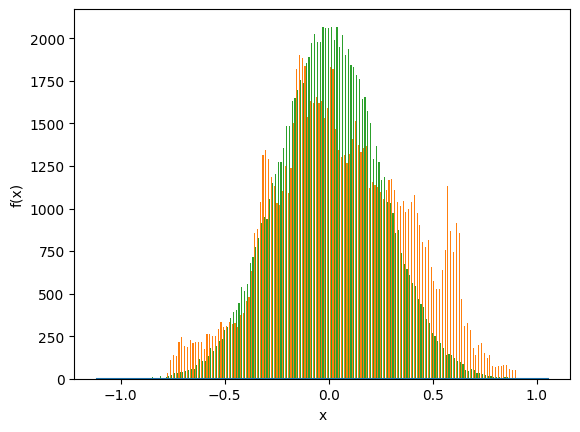

Reservoir warmed up with the first 100 time steps
900
Reservoir warmed up with the first 100 time steps
900


In [8]:
from Metrics import * 
from Evaluator import Evaluator

results = Evaluator(path=".", experiment_name="Unit_test").evaluate_multiple(configs, data = MG17(), repetitions=1 )

In [6]:
results

,Model Name,Model Index,Aggregation,MSE,NRMSE,MC,MLLE,DeltaPhi,Neff
0,IP Reservoir,0.0,Mean,0.000039,0.905913,28.156561,0.121235,0.043933,5.752318
1,IP Reservoir,0.0,Std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Vanilla,1.0,Mean,0.000054,1.070525,14.339738,-0.052641,0.049283,2.679662
3,Vanilla,1.0,Std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
